# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:220%; text-align:center; border-radius:10px 10px;">Comaprison of the Regression Models: Rock Density Dataset</p>


<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">Table of Contents
    
#### Explore the Data
#### Train | Test Split
#### Machine Learning Regression Models
#### 1. Linear Regression
#### 2. Polynomial Regression
* Pipeline for Polynomial Orders
* Comparing Various Polynomial Orders
#### 3. KNN Regression
#### 4. Support Vector Machines (SVM) Regression
#### 5. Decision Tree Regression
#### 6. Random Forest Regression
#### 7. Gradient Boosting
#### 8. AdaBoost
</div>

<div class="alert alert-block alert-success">
    
## <span style=" color:#d93267">About the Dataset

Tunnel boring companies use X-rays in an attempt to know rock density. This will allow them to switch out boring heads on their equipment before mining through the rock. They provide us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. 

Based on this data, we will try to catch the pattern by drawing a fit line so that we can use the model in the following predictions. We will also compare the error scores (MAE and  RMSE) obtained from various Machine Learning Regression models.
</span>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the Data

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


**Rename the columns as Signal and Density**

In [5]:
df.columns = ["Signal", "Density"]

In [6]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


**See the data distribution**

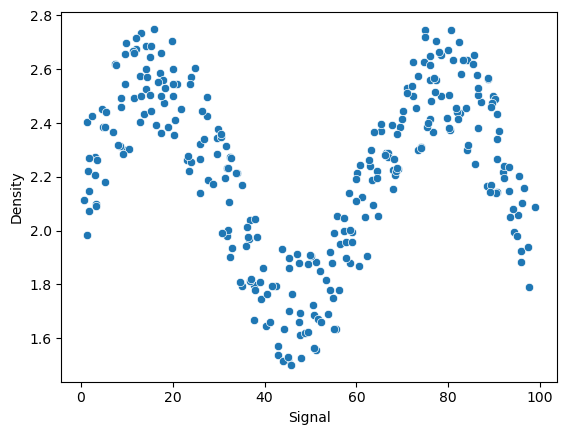

In [7]:
sns.scatterplot(df, x="Signal", y="Density");

## Train | Test Split
**Since the data has only one independent variable (Signal) and does not have a huge magnitude we will not use scaling in this analysis.**

In [8]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

# We used "values.reshape(-1,1)" to avoid error because the data has only one feature (Signal)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

---
# Machine Learning Regression Models

# 1. Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Linear Regression model
lr_model = LinearRegression()

In [13]:
# Fit the model
lr_model.fit(X_train,y_train)

LinearRegression()

In [14]:
# Prediction
lr_preds = lr_model.predict(X_test)

In [15]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

**Predictions of the linear regression model give us a signal. Although its distribution is between 1.5 and 2.8, the predictions are around 2.2. So it vacillates around an average value. We can understand it better when we see error metrics and the fit line.**

### Evaluation of Linear Regression Model

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
# MAE
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [18]:
# RMSE
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

**Even if it perfoms quite well "on average", we need to see the fit line. What does the fit look like?**

In [19]:
signal_range = np.arange(0,100)

In [20]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

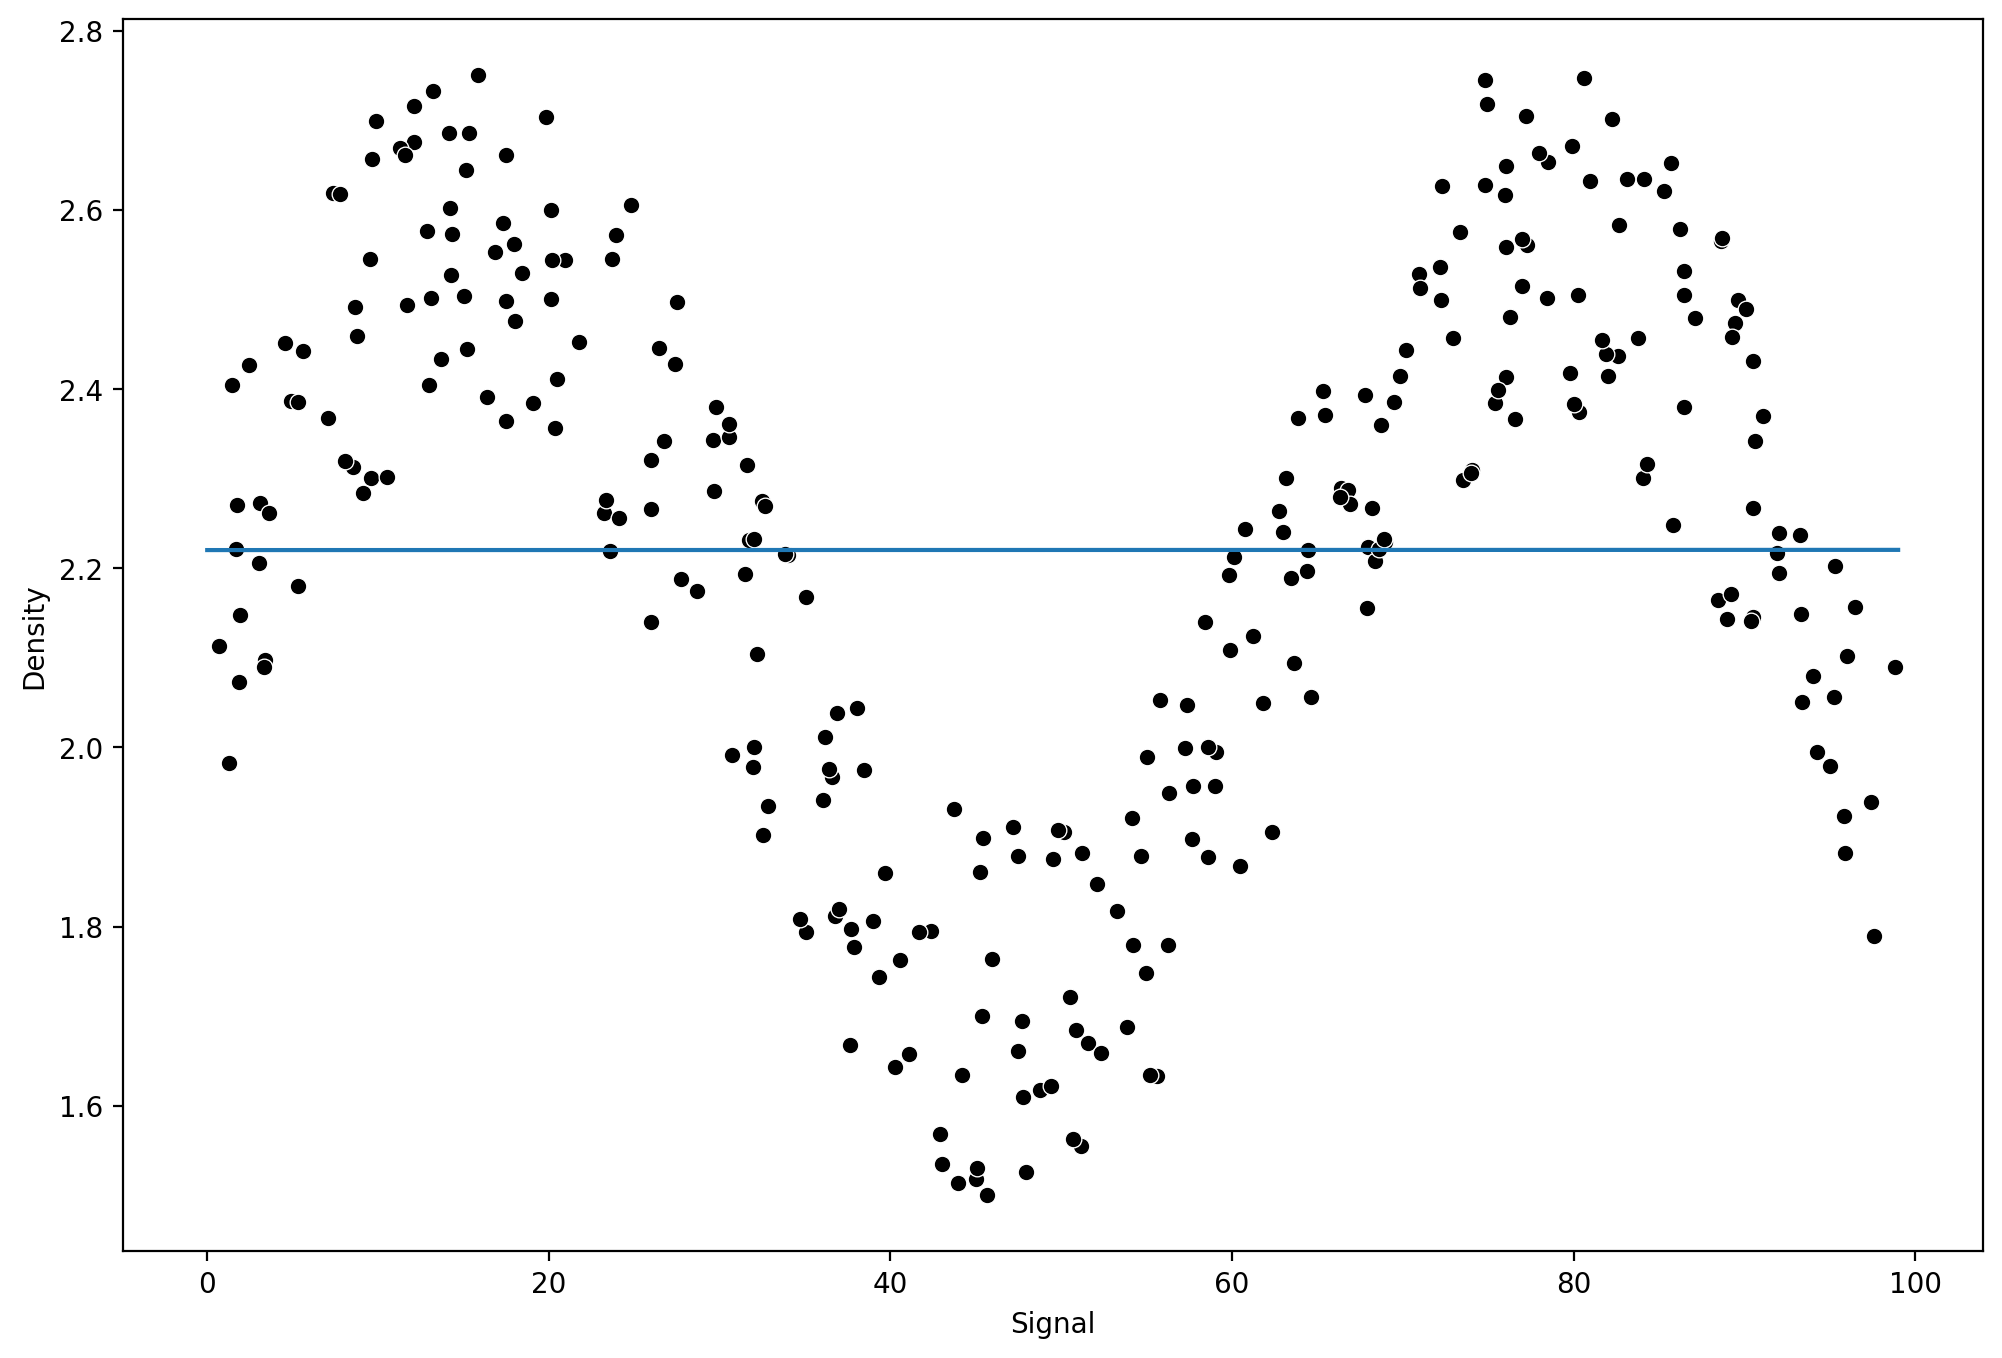

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,signal_preds);

---
# 2. Polynomial Regression
**The Linear Regression model failed in the predictions of the data points because of the distribution of the data. Let's try this time the Polynomial Regression model with different degrees to see if it can explain the pattern and predict the data points.**

### Create a Function to Run Models

In [22]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model Training
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test,preds)
    print(f'MAE : {mae}')
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,signal_preds)

In [23]:
# Remember Linear Regression Model (namely, Polynomial Regression with degree 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

MAE : 0.211198973318633
RMSE : 0.2570051996584629


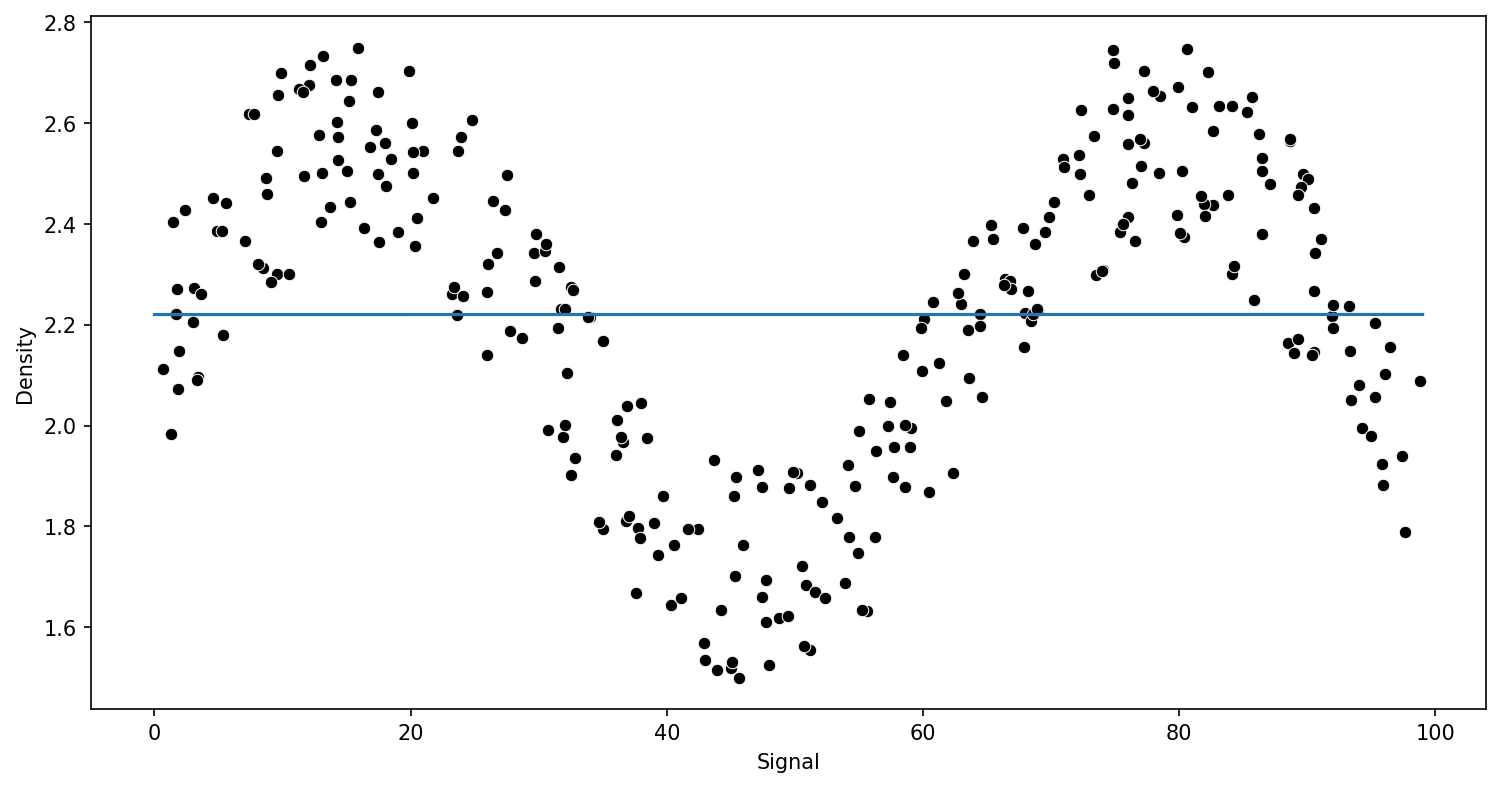

In [24]:
run_model(model,X_train,y_train,X_test,y_test)

# For comparison...
# Display the fit line, MAE and RMSE 

## Pipeline for Polynomial Orders

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# create the pipeline model for polynomial features

pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression()) # degree 2

MAE : 0.2290310544351129
RMSE : 0.28173095637255835


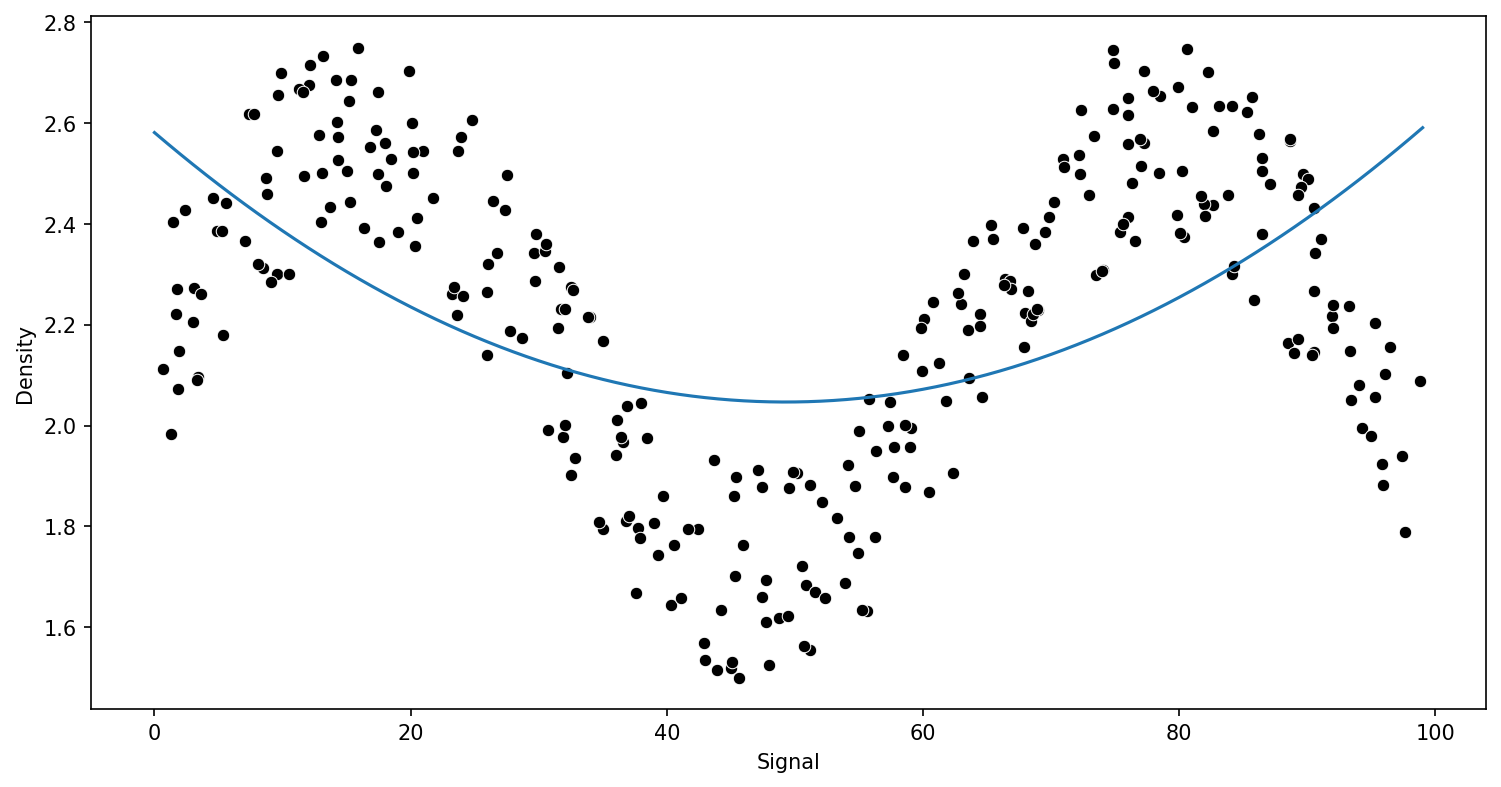

In [27]:
# use the function above
run_model(pipe,X_train,y_train,X_test,y_test)

### Comparing Various Polynomial Orders

MAE : 0.12467306454251856
RMSE : 0.14035228495977833


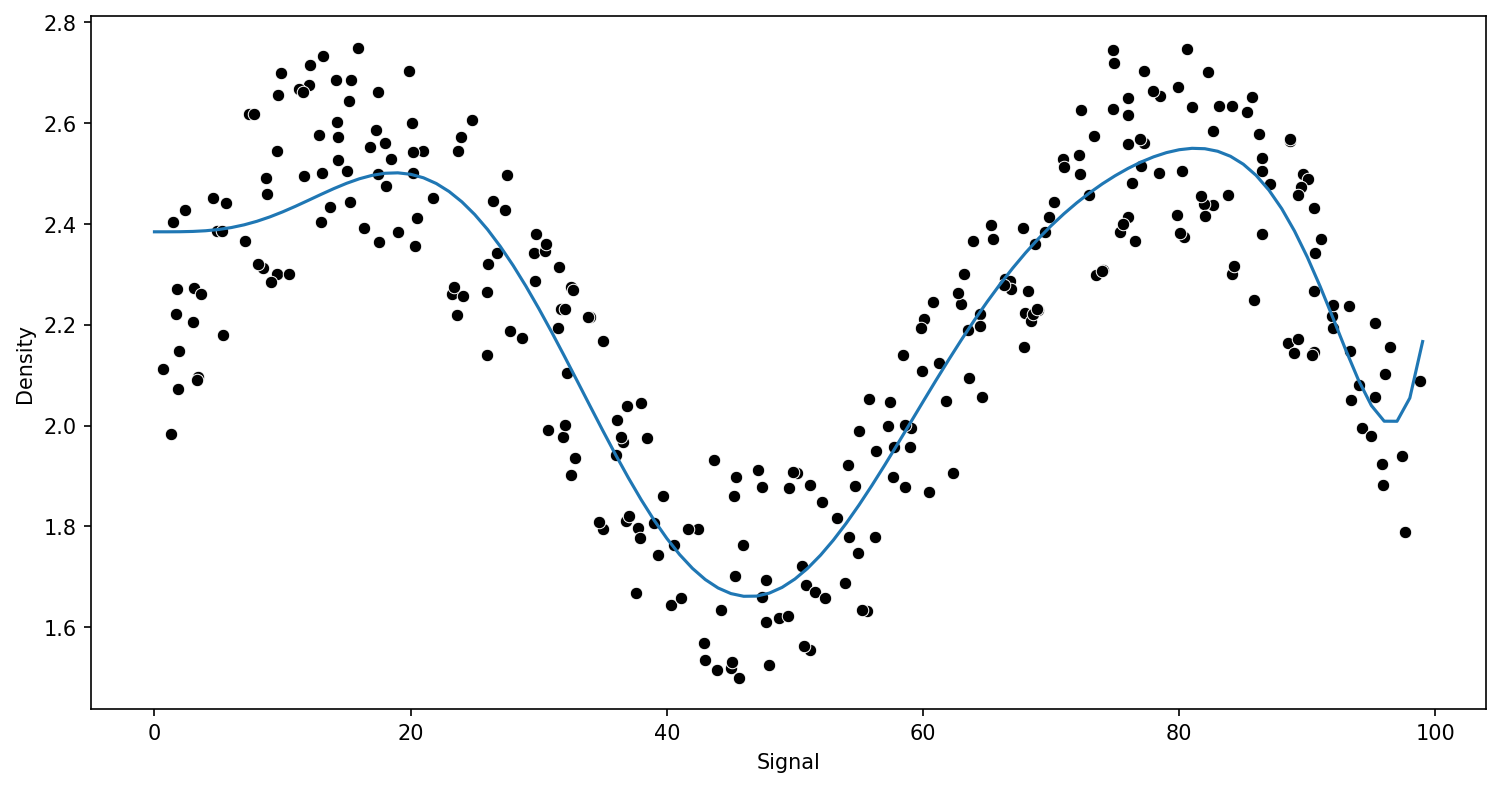

In [28]:
# Let's increase the degree 

pipe = make_pipeline(PolynomialFeatures(10),LinearRegression()) # degree 10
run_model(pipe,X_train,y_train,X_test,y_test)

**Although polynomial regression with 10 degree shows a great great, it creates high varience causing overfitting. We can decrease the degree.**

MAE : 0.119690915641049
RMSE : 0.13807393264835693


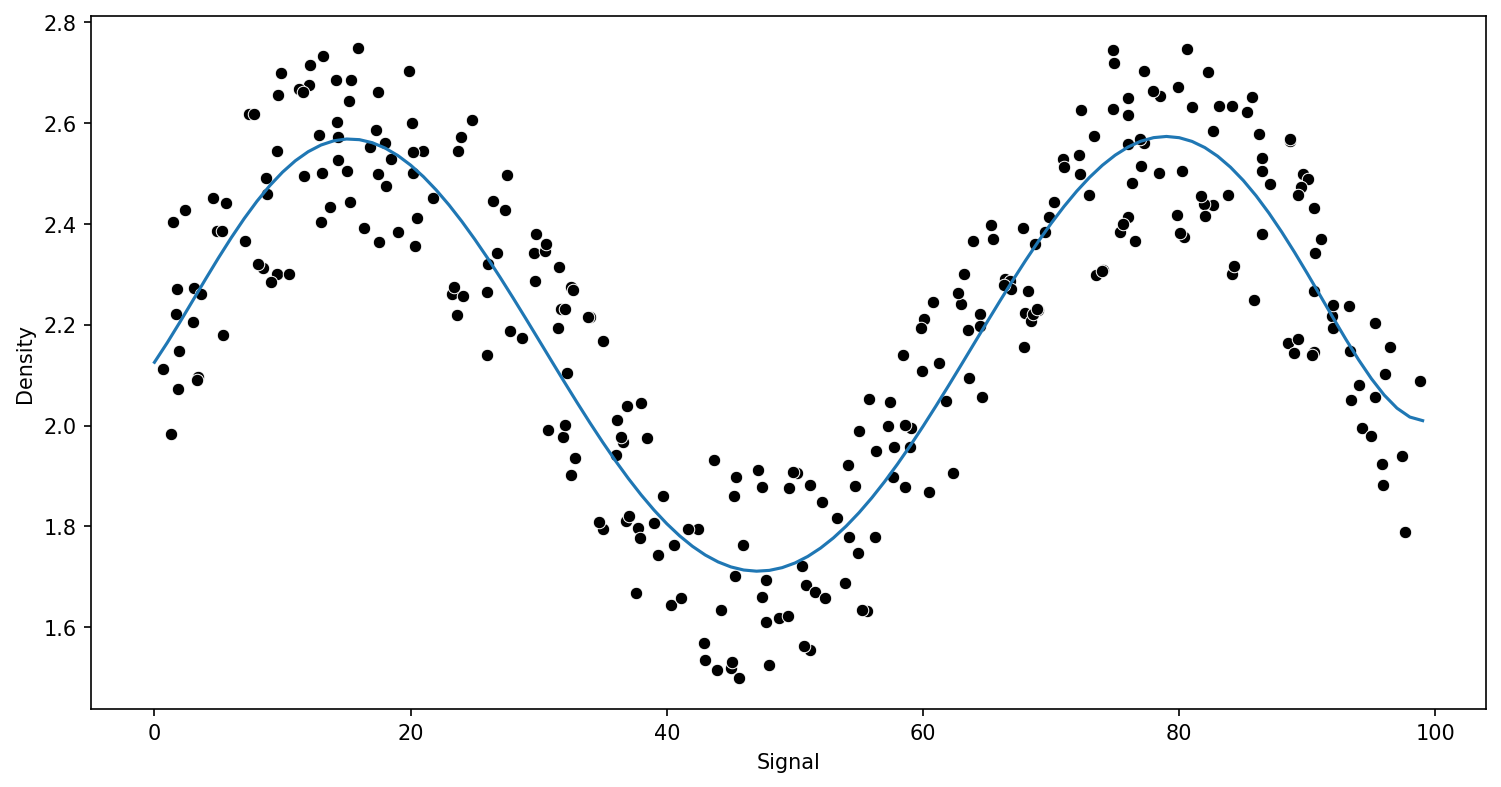

In [29]:
# For degree 6
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

# The fit line
# RMSE and MAE

**Result:** Compared to Polynomial Regression model with "degree 10", "degree 6" provided lower error scores.

----

# 3. KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337
MAE : 0.12198383614100558
RMSE : 0.13730685016923647
MAE : 0.11635971693292672
RMSE : 0.13277855732740926


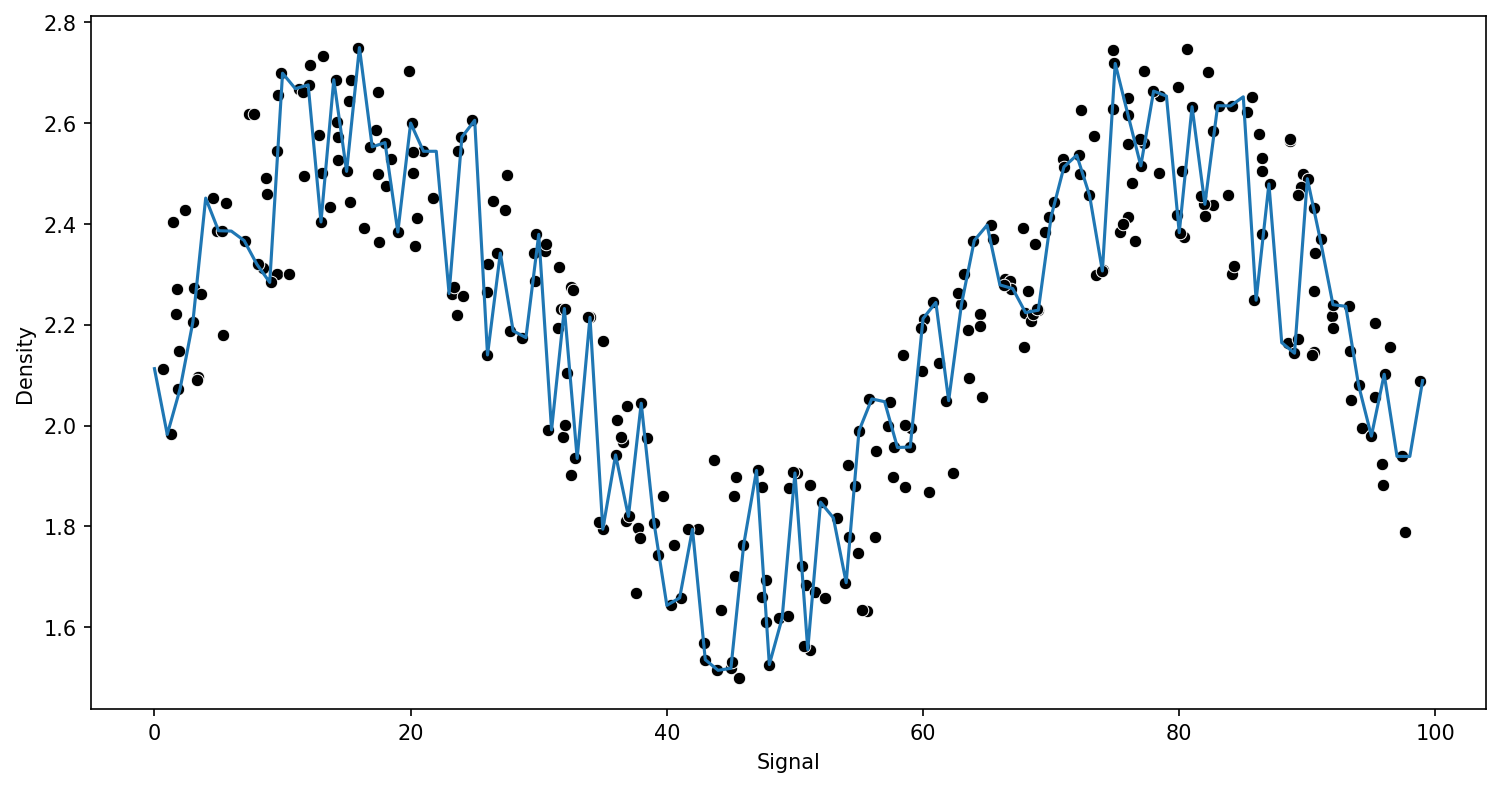

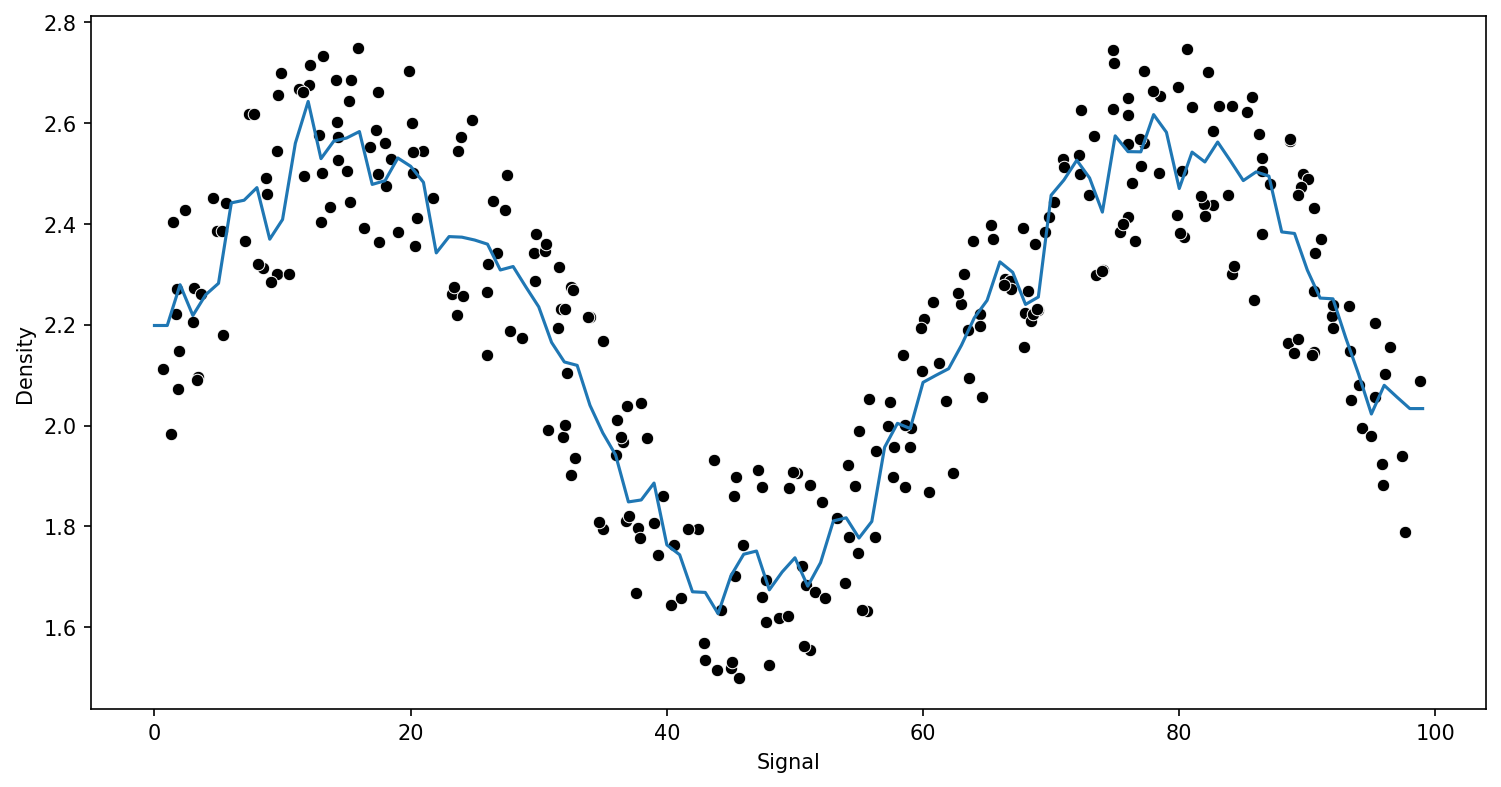

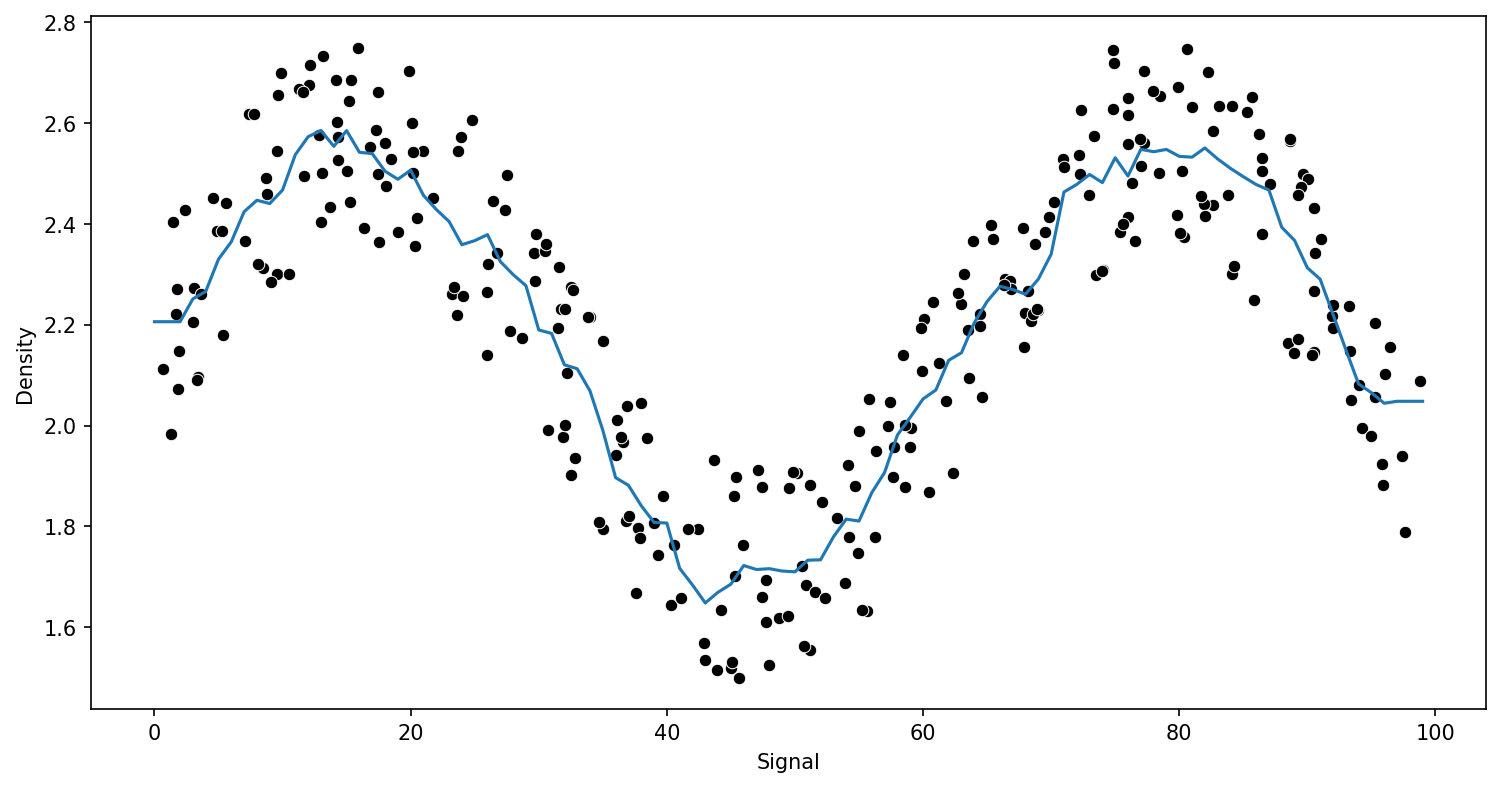

In [31]:
# predictions for different K values

preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

**Result:** For higher K value (for 1, 5, 10) we introduce more bias and it prevents overfitting. Prediction of KNN model for k=10 is very close to Polynomial Regression model with degree=6. Compare the RMSE and MAE scores above.

----

# 4. Support Vector Machines (SVM) Regression

In [32]:
from sklearn.svm import SVR # regression

In [33]:
# For the best parameters create a grid model

from sklearn.model_selection import GridSearchCV

In [34]:
# The model
svr = SVR()

# Parameters
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}

In [35]:
# Grid SVR model
grid = GridSearchCV(svr,param_grid)

MAE : 0.10854210121348368
RMSE : 0.12646999302046696


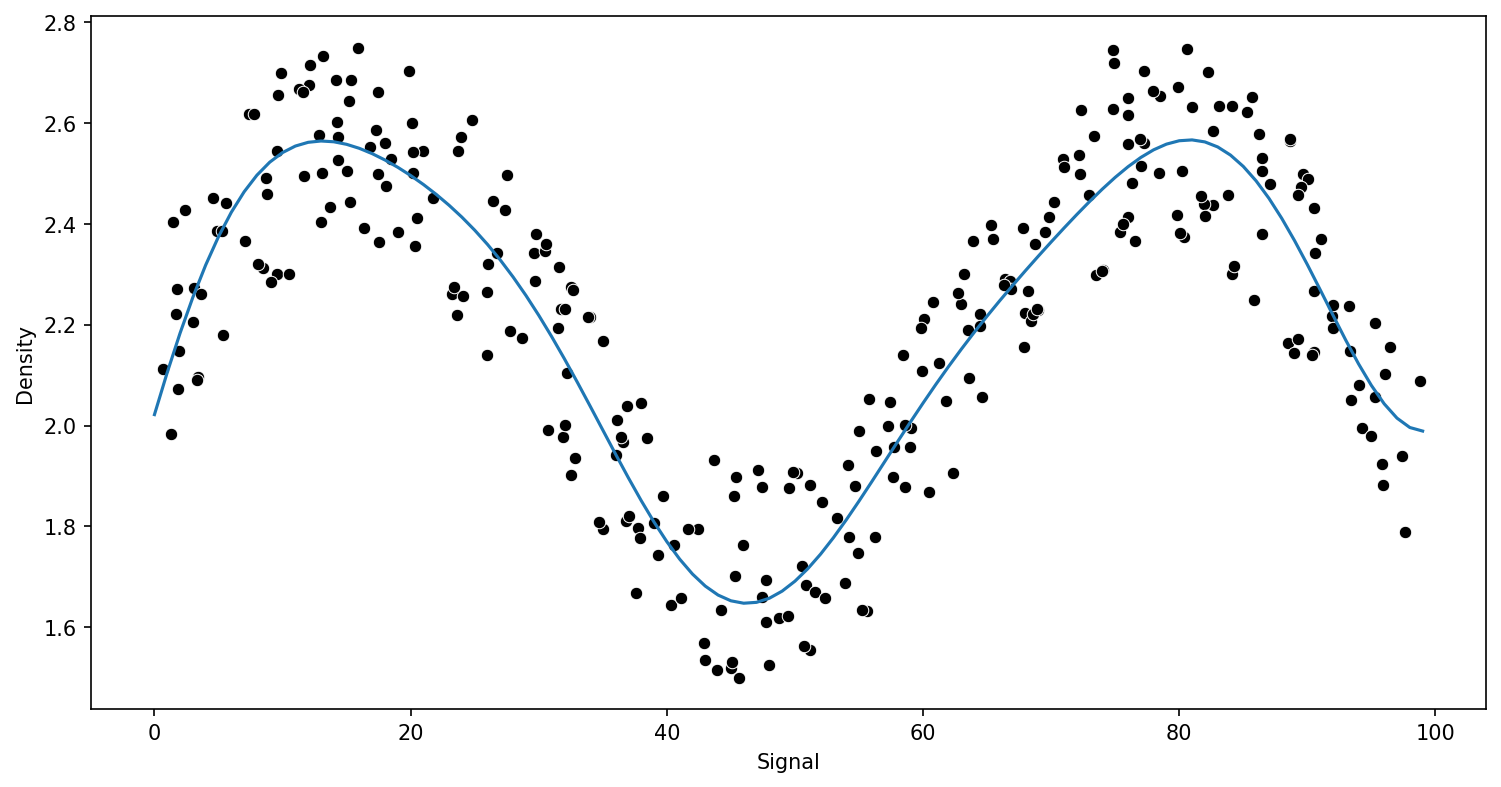

In [36]:
run_model(grid,X_train,y_train,X_test,y_test)

In [37]:
# See the best C value for this model
grid.best_estimator_

SVR(C=1000)

**Result:** SVM Regression model shows lower error scores compared to KNN model with different K values and the Polynomial Regression model with degree 6.

---
# 5. Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


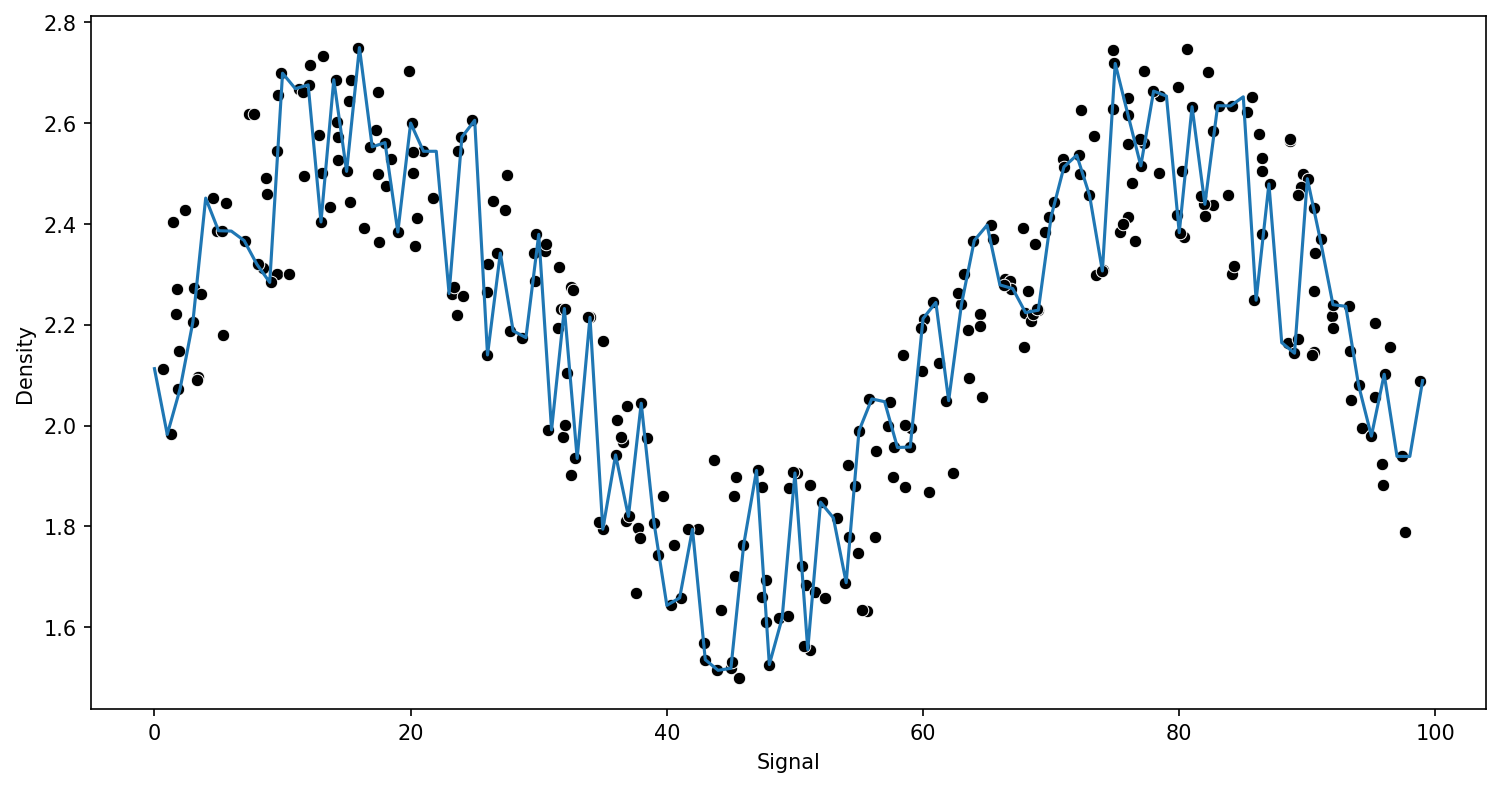

In [39]:
model = DecisionTreeRegressor() # default model

run_model(model,X_train,y_train,X_test,y_test)

**Result:** Compared to the models above, Decision Tree Regression model did not provide lower error scores. Additionally, the fit line seems overfitted.

---

# 6. Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# help(RandomForestRegressor)

MAE : 0.12503932460484304
RMSE : 0.1467103434650528
MAE : 0.11329331240892684
RMSE : 0.1373887059097052
MAE : 0.11245695009350286
RMSE : 0.136490098842778


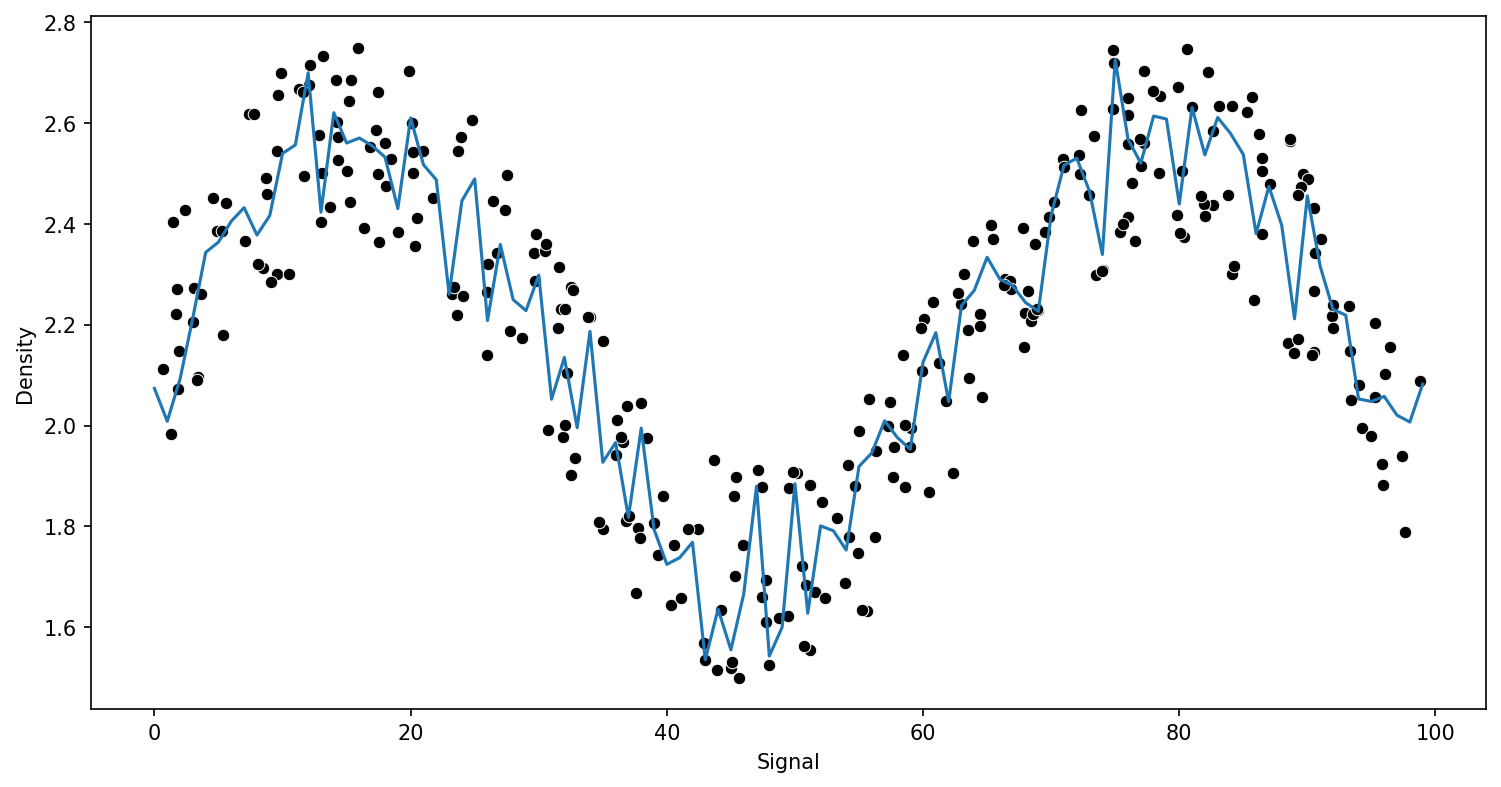

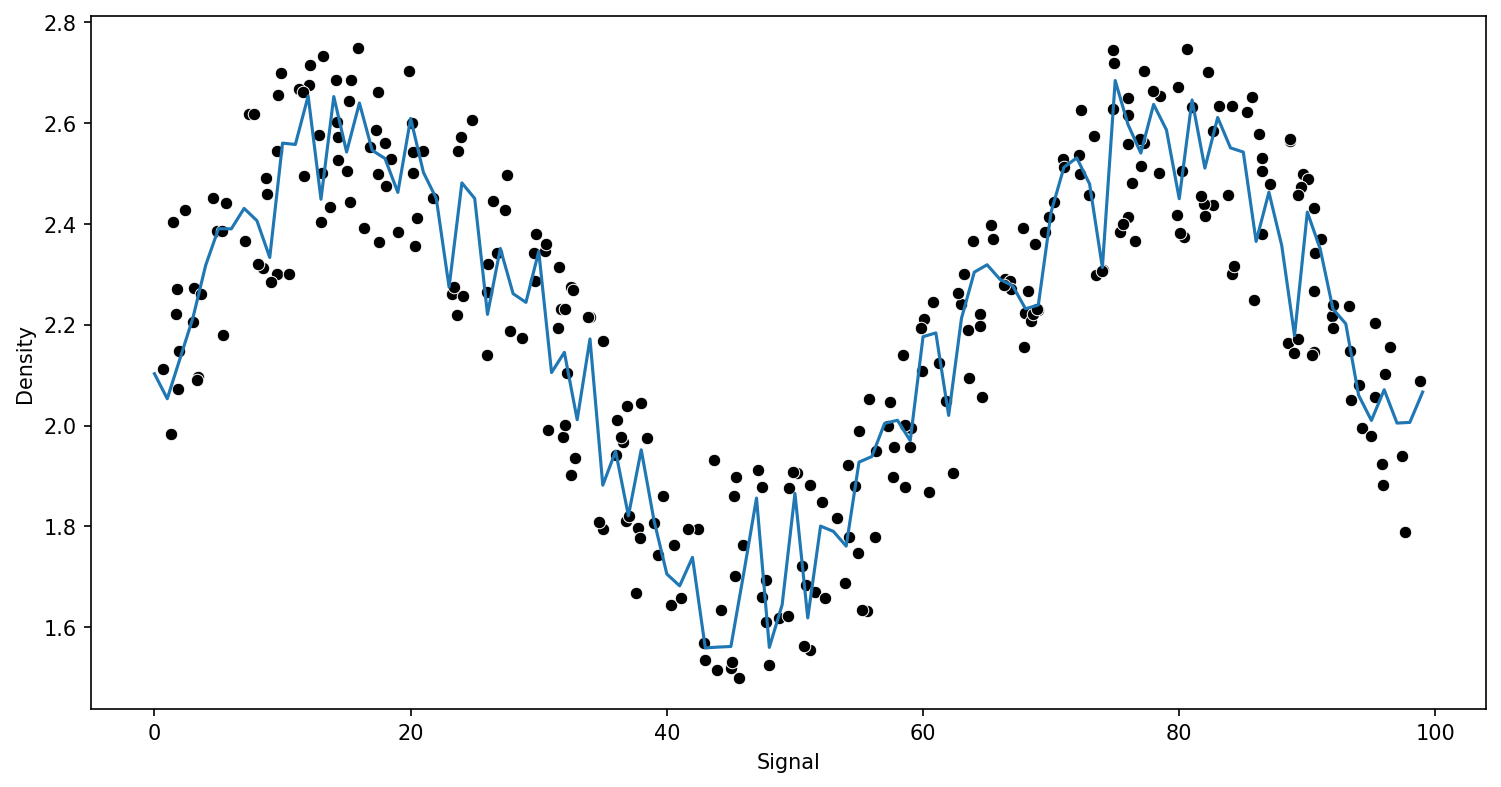

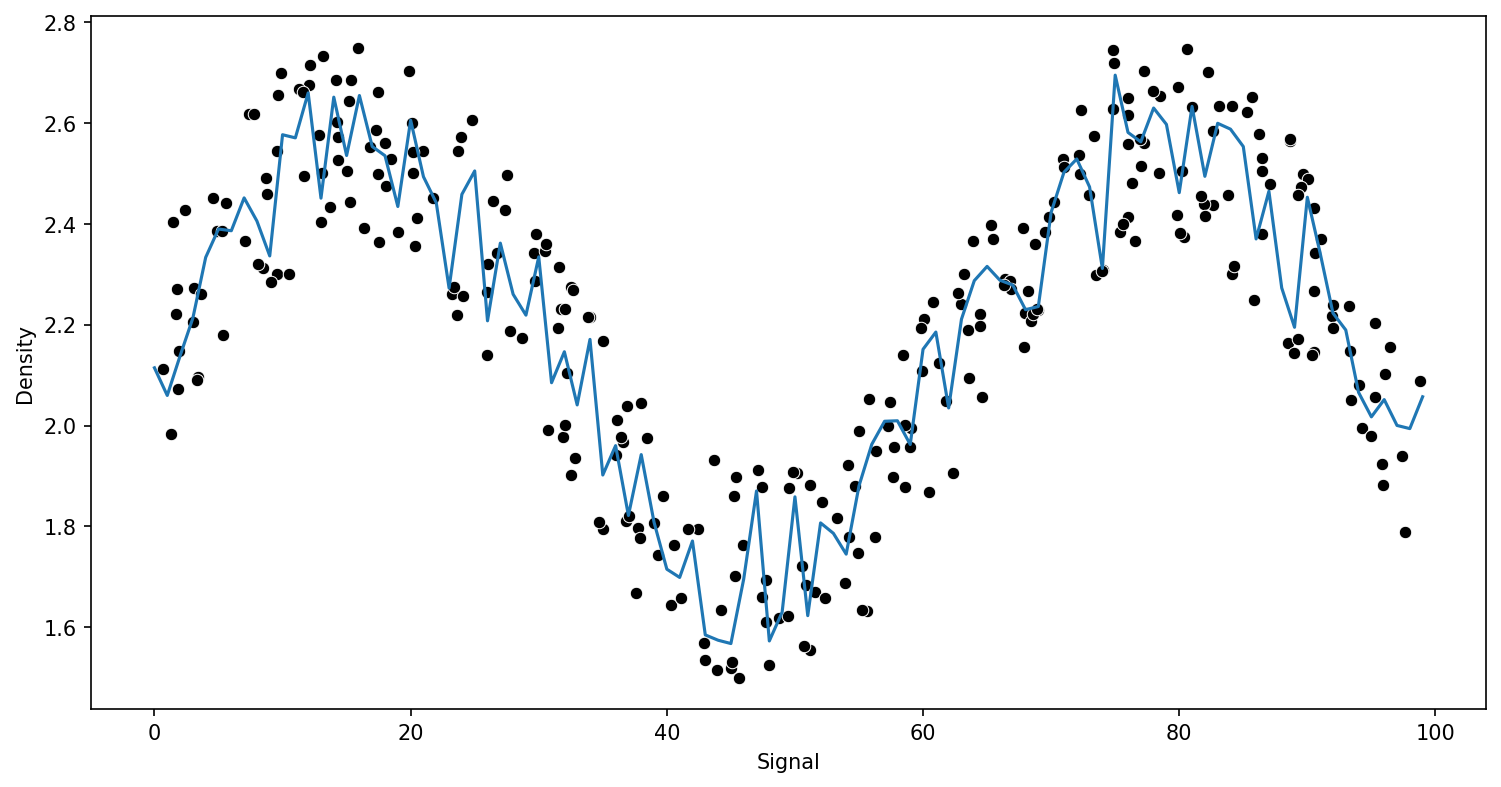

In [42]:
# Results for different number of estimators/trees

trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

**Result:** Although the Random Forest Regression model displays lower error scores compared to the Decision Tree model, it could not exceed the SVM Regression model.

---
# 7. Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
# help(GradientBoostingRegressor)

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


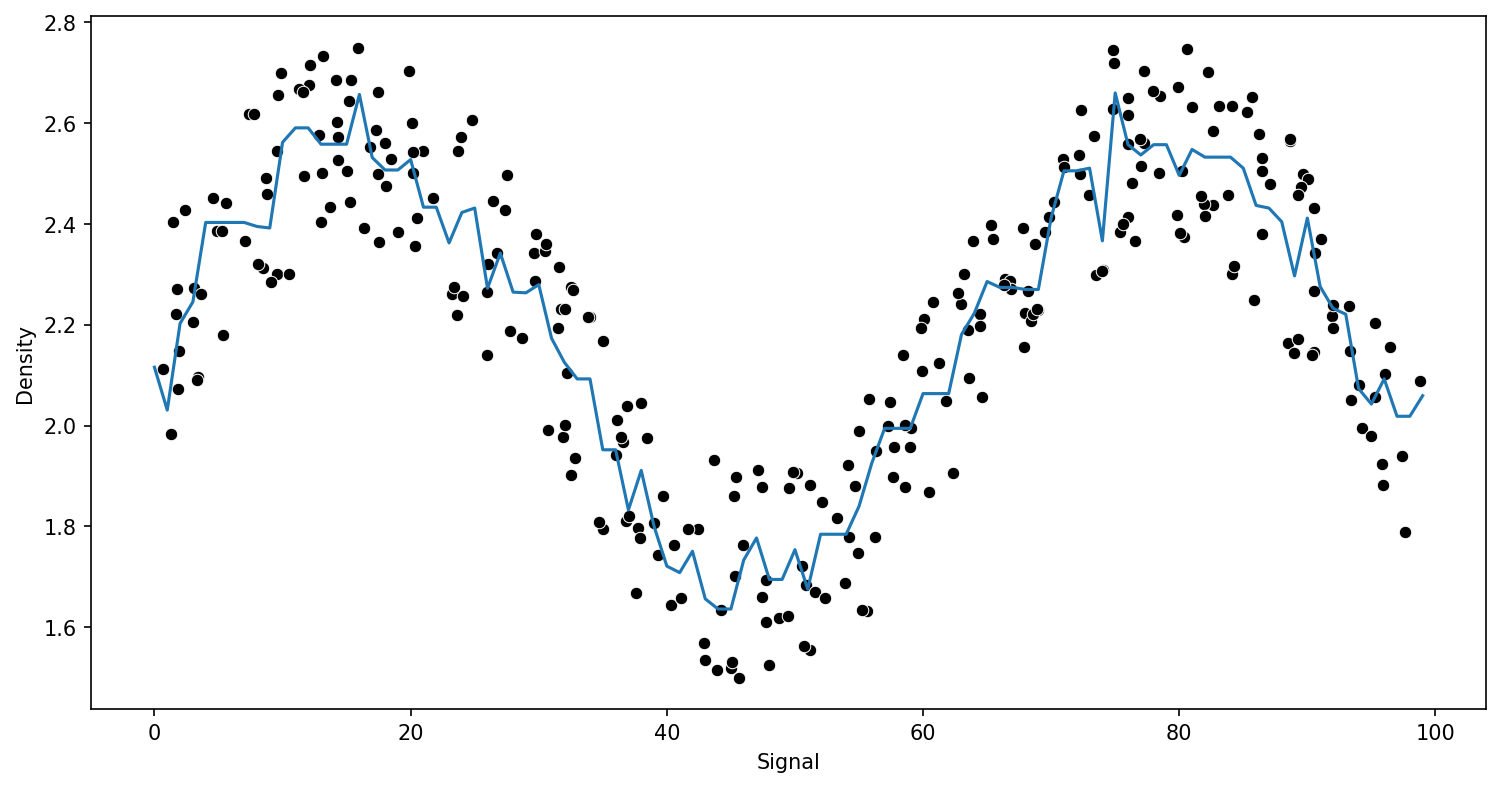

In [45]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

---
# 8. AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostRegressor

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


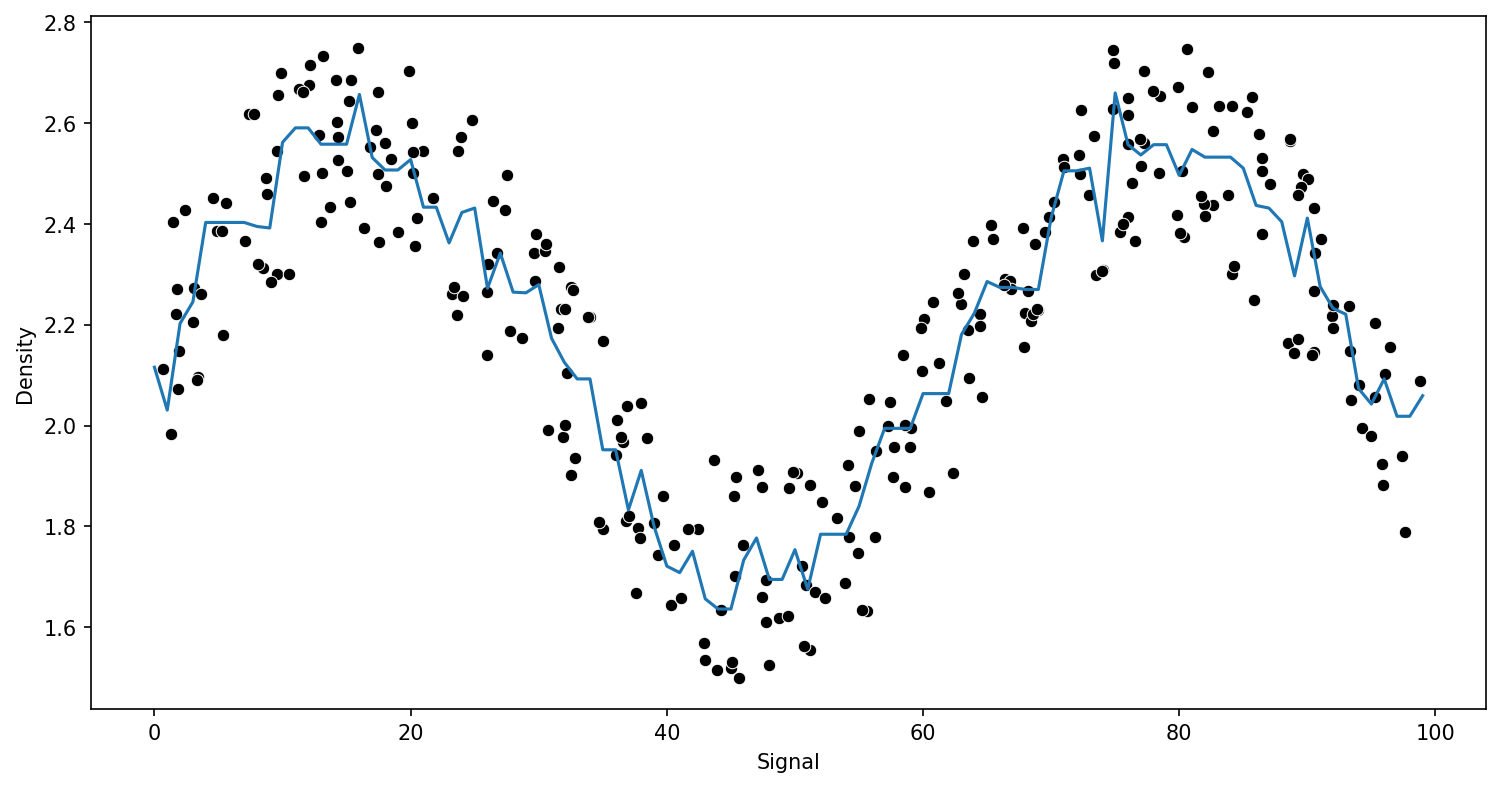

In [47]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

**Result:** Both boosting models displays same error scores. Compared to boosting models, on the other hand, Random Forest Regression model (for 100 estimators) provided a little bit lower error scores, that is, better prediction for this dataset. Overall, the SVM Regression model provided the lowest error scores.